<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

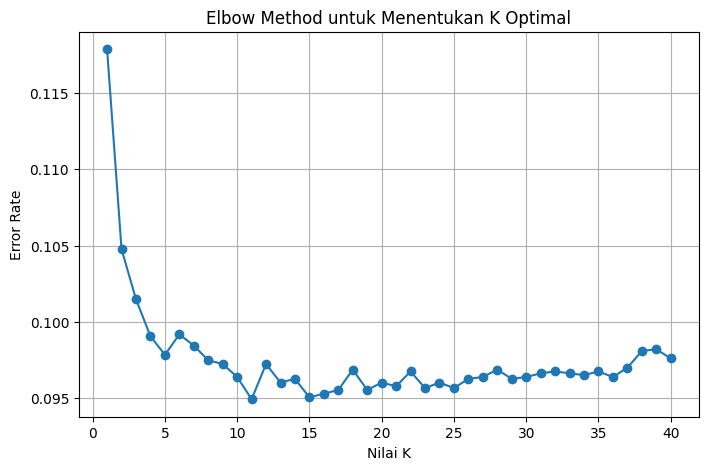

Nilai K Optimal: 11
Confusion Matrix:
[[7177  133]
 [ 649  279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.68      0.30      0.42       928

    accuracy                           0.91      8238
   macro avg       0.80      0.64      0.68      8238
weighted avg       0.89      0.91      0.89      8238

Prediksi: Pelanggan TIDAK berlangganan deposito


c:\Users\user\OneDrive\Documents\MLKNN\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
#– Judul & Deskripsi (Markdown)
# KNN Classification – Bank Marketing Dataset

#Alur pemodelan:
#Load Data → Split → Scale → Cari K Optimal → Evaluasi → Prediksi Data Bar
#  – Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load dataset
data = pd.read_csv("bank-additional-full.csv", sep=';')

# Cek data
data.head()

 #Informasi Dataset
data.info()

#– Pemisahan Fitur & Target
# Target adalah kolom 'y'
X = data.drop("y", axis=1)
y = data["y"]

# Ubah label menjadi numerik
y = y.map({"no": 0, "yes": 1})


# KNN tidak bisa membaca data string
X = pd.get_dummies(X, drop_first=True)

X.head()

#– Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data Train:", X_train.shape)
print("Data Test :", X_test.shape)

# – Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#– Mencari Nilai K Optimal (Elbow Method)
error_rate = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

#– Visualisasi Error Rate
plt.figure(figsize=(8,5))
plt.plot(range(1,41), error_rate, marker='o')
plt.xlabel("Nilai K")
plt.ylabel("Error Rate")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.grid()
plt.show()

# – Menentukan K Optimal
k_optimal = error_rate.index(min(error_rate)) + 1
print("Nilai K Optimal:", k_optimal)

#Training Model KNN Final
knn_final = KNeighborsClassifier(n_neighbors=k_optimal)
knn_final.fit(X_train_scaled, y_train)

#– Evaluasi Model
y_pred_final = knn_final.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Simulasi Prediksi Data Baru
# Contoh data baru (mengambil 1 data dari training)
data_baru = X_train.iloc[0].values.reshape(1, -1)

# Scaling data baru
data_baru_scaled = scaler.transform(data_baru)

# Prediksi
prediksi = knn_final.predict(data_baru_scaled)

if prediksi[0] == 1:
    print("Prediksi: Pelanggan AKAN berlangganan deposito")
else:
    print("Prediksi: Pelanggan TIDAK berlangganan deposito")

    import pickle

# Simpan model dan scaler
pickle.dump(knn_final, open("model_knn.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
